# Analyze dynophores

## Aim of this notebook

Explore how to analyze dynophores in a Jupyter notebook!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import defaultdict
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import dynophores

In [3]:
DATA = Path('../data/out/DynophoreApp')

In [4]:
dynophore_files = [file for file in DATA.glob('*')]
dynophore_files[:3]

[PosixPath('../data/out/DynophoreApp/1KE7-1_Data__superFeature_HBA[4619]%12.3.txt'),
 PosixPath('../data/out/DynophoreApp/1KE7-1_Data__superFeature_HBA[4618]%0.2.txt'),
 PosixPath('../data/out/DynophoreApp/1KE7-1_Data__superFeature_AR[4622,4615,4623,4613,4614,4621]%4.0.txt')]

### `Dynophore` instance

In [5]:
dynophore = dynophores.Dynophore()

In [6]:
dynophore._get_file_components(dynophore_files[0])

{'filepath': PosixPath('../data/out/DynophoreApp/1KE7-1_Data__superFeature_HBA[4619]%12.3.txt'),
 'dynophore_id': '1KE7-1',
 'superfeature_id': 'HBA[4619]',
 'superfeature_feature_type': 'HBA',
 'superfeature_atom_numbers': [4619],
 'envpartner_id': None,
 'envpartner_residue_name': None,
 'envpartner_residue_number': None,
 'envpartner_chain': None,
 'envpartner_atom_numbers': None}

In [7]:
dynophore.from_file(DATA)  

print(dynophore.id)
print(dynophore.superfeatures[2].id)
print(dynophore.superfeatures[2].feature_type)
print(dynophore.superfeatures[2].atom_numbers)
print(dynophore.superfeatures[2].occurrences)
print(dynophore.superfeatures[2].envpartners[0].id)
print(dynophore.superfeatures[2].envpartners[0].residue_name)
print(dynophore.superfeatures[2].envpartners[0].residue_number)
print(dynophore.superfeatures[2].envpartners[0].chain)
print(dynophore.superfeatures[2].envpartners[0].atom_numbers)
print(dynophore.superfeatures[2].envpartners[0].occurrences)
print(dynophore.superfeatures[2].envpartners[0].distances)

1KE7-1
AR[4622,4615,4623,4613,4614,4621]
AR
[4622, 4615, 4623, 4613, 4614, 4621]
[0 0 0 ... 0 0 0]
ILE-10-A[165]
ILE
10
A
[165]
[0 0 0 ... 0 0 0]
[7.1051545 7.1051545 7.267492  ... 0.        0.        0.       ]


#### `dynophore.superfeatures_occurrences`

In [8]:
dynophore.superfeatures_occurrences.head()

,HBA[4619],HBA[4618],"AR[4622,4615,4623,4613,4614,4621]","AR[4605,4607,4603,4606,4604]","H[4599,4602,4601,4608,4609,4600]",HBA[4596],HBD[4598],HBA[4606],"H[4615,4623,4622,4613,4621,4614]",HBD[4612]
0,1,0,0,0,1,1,0,0,1,0
1,1,0,0,0,1,1,0,0,1,0
2,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,1,1


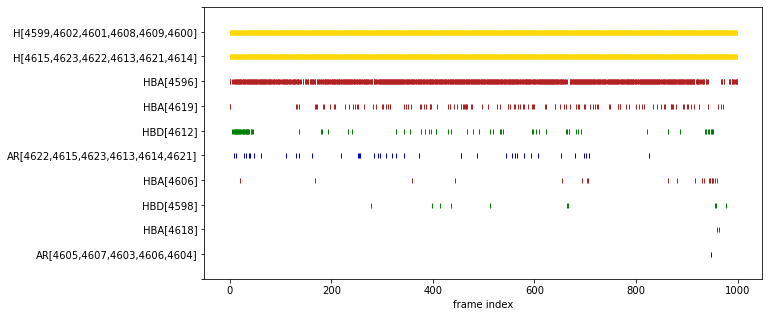

In [9]:
dynophore.plot_superfeatures_occurrences()

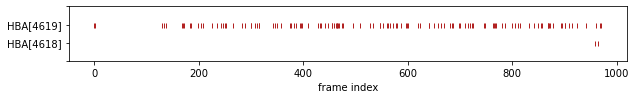

In [10]:
dynophore.plot_superfeatures_occurrences(superfeature_names=['HBA[4619]', 'HBA[4618]'])

Superfeature names ['Nonesense'] omitted because unknown.


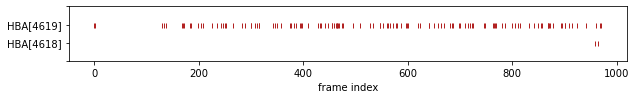

In [11]:
dynophore.plot_superfeatures_occurrences(superfeature_names=['HBA[4619]', 'HBA[4618]', 'Nonesense'])

#### `dynophore.envpartners_occurrences`

In [12]:
print(dynophore.envpartners_occurrences.keys())
dynophore.envpartners_occurrences['HBA[4619]'].head()

dict_keys(['HBA[4619]', 'HBA[4618]', 'AR[4622,4615,4623,4613,4614,4621]', 'AR[4605,4607,4603,4606,4604]', 'H[4599,4602,4601,4608,4609,4600]', 'HBA[4596]', 'HBD[4598]', 'HBA[4606]', 'H[4615,4623,4622,4613,4621,4614]', 'HBD[4612]'])


,LYS-20-A[308],LYS-20-A[316],ILE-10-A[165],ASP-86-A[1313]
0,0,0,0,1
1,0,0,0,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


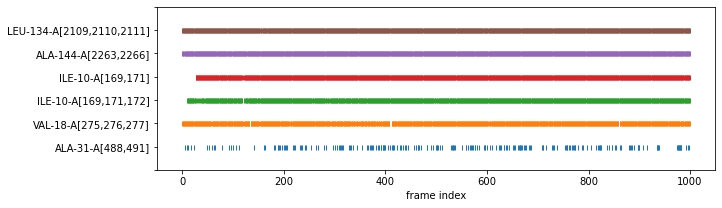

In [13]:
dynophore.plot_envpartners_occurrences('H[4599,4602,4601,4608,4609,4600]')

#### `dynophore.envpartners_distances`

In [14]:
print(dynophore.envpartners_distances.keys())
dynophore.envpartners_distances['HBA[4619]'].head()

dict_keys(['HBA[4619]', 'HBA[4618]', 'AR[4622,4615,4623,4613,4614,4621]', 'AR[4605,4607,4603,4606,4604]', 'H[4599,4602,4601,4608,4609,4600]', 'HBA[4596]', 'HBD[4598]', 'HBA[4606]', 'H[4615,4623,4622,4613,4621,4614]', 'HBD[4612]'])


,LYS-20-A[308],LYS-20-A[316],ILE-10-A[165],ASP-86-A[1313]
0,12.086337,10.283849,10.234147,2.995031
1,12.086337,10.283849,10.234147,2.995031
2,10.457222,9.915476,8.992463,5.948585
3,10.351493,8.698255,9.028577,6.975447
4,10.532646,10.217158,9.939754,5.173286


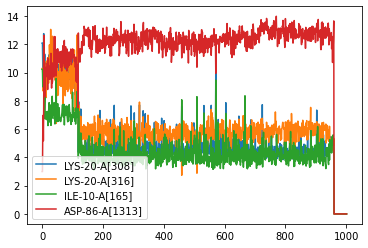

In [15]:
dynophore.envpartners_distances['HBA[4619]'].plot()

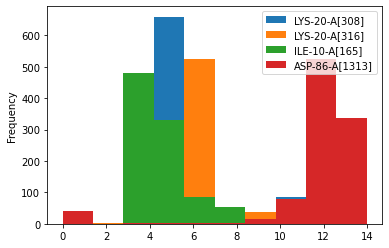

In [16]:
dynophore.envpartners_distances['HBA[4619]'].plot(kind='hist')

#### `superfeature.envpartners_occurrences`

In [17]:
dynophore.superfeatures[0].envpartners_occurrences.head()

,LYS-20-A[308],LYS-20-A[316],ILE-10-A[165],ASP-86-A[1313]
0,0,0,0,1
1,0,0,0,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


#### `superfeature.envpartners_distances`

In [18]:
sum(np.array([1,2]))

3

In [19]:
dynophore.superfeatures[0].envpartners_distances.head()

,LYS-20-A[308],LYS-20-A[316],ILE-10-A[165],ASP-86-A[1313]
0,12.086337,10.283849,10.234147,2.995031
1,12.086337,10.283849,10.234147,2.995031
2,10.457222,9.915476,8.992463,5.948585
3,10.351493,8.698255,9.028577,6.975447
4,10.532646,10.217158,9.939754,5.173286


#### `n_frames`, `count`, and `frequency`

##### Dynophore

In [20]:
dynophore.n_frames

1002

In [21]:
dynophore.count

,HBA[4619],HBA[4618],"AR[4622,4615,4623,4613,4614,4621]","AR[4605,4607,4603,4606,4604]","H[4599,4602,4601,4608,4609,4600]",HBA[4596],HBD[4598],HBA[4606],"H[4615,4623,4622,4613,4621,4614]",HBD[4612]
"ALA-144-A[2263,2266]",0,0,0,0,992,0,0,0,0,0
"ALA-31-A[488,491]",0,0,0,0,216,0,0,0,0,0
ASP-86-A[1313],2,0,0,0,0,0,0,0,0,0
ASP-86-A[1319],0,0,0,0,0,0,0,0,0,18
ASP-86-A[1320],0,0,0,0,0,0,0,0,0,20
GLN-131-A[2057],0,0,0,0,0,0,0,0,0,1
GLN-131-A[2061],0,0,0,0,0,0,0,0,0,8
GLN-131-A[2062],0,0,0,0,0,0,0,2,0,0
GLU-81-A[1228],0,0,0,0,0,0,8,0,0,0
"HIS-84-A[1284,1285,1286,1287,1288]",0,0,1,0,0,0,0,0,0,0


In [22]:
dynophore.frequency

,HBA[4619],HBA[4618],"AR[4622,4615,4623,4613,4614,4621]","AR[4605,4607,4603,4606,4604]","H[4599,4602,4601,4608,4609,4600]",HBA[4596],HBD[4598],HBA[4606],"H[4615,4623,4622,4613,4621,4614]",HBD[4612]
"ALA-144-A[2263,2266]",0.00,0.0,0.00,0.0,99.00,0.00,0.0,0.0,0.00,0.00
"ALA-31-A[488,491]",0.00,0.0,0.00,0.0,21.56,0.00,0.0,0.0,0.00,0.00
ASP-86-A[1313],0.20,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00
ASP-86-A[1319],0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,1.80
ASP-86-A[1320],0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,2.00
GLN-131-A[2057],0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.10
GLN-131-A[2061],0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.80
GLN-131-A[2062],0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.2,0.00,0.00
GLU-81-A[1228],0.00,0.0,0.00,0.0,0.00,0.00,0.8,0.0,0.00,0.00
"HIS-84-A[1284,1285,1286,1287,1288]",0.00,0.0,0.10,0.0,0.00,0.00,0.0,0.0,0.00,0.00


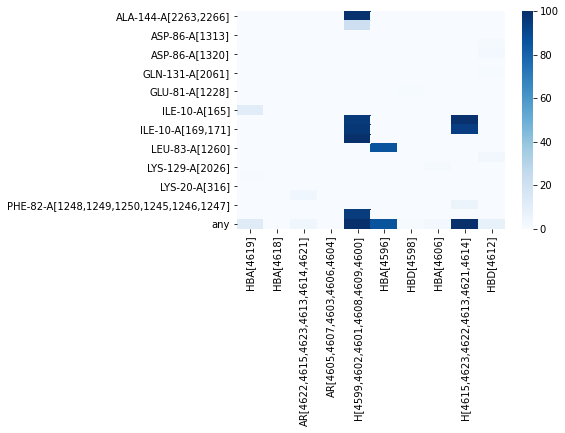

In [23]:
sns.heatmap(dynophore.frequency, cmap='Blues')

##### Superfeatures

In [24]:
dynophore.superfeatures[0].n_frames

1002

In [25]:
dynophore.superfeatures[0].count

any               123
LYS-20-A[308]       5
LYS-20-A[316]       3
ILE-10-A[165]     116
ASP-86-A[1313]      2
dtype: int64

In [26]:
dynophore.superfeatures[0].frequency

any               12.28
LYS-20-A[308]      0.50
LYS-20-A[316]      0.30
ILE-10-A[165]     11.58
ASP-86-A[1313]     0.20
dtype: float64

##### Environmental partners

In [27]:
dynophore.superfeatures[0].envpartners[2].n_frames

1002

In [28]:
dynophore.superfeatures[0].envpartners[2].count

116

In [29]:
dynophore.superfeatures[0].envpartners[2].frequency

11.58